In [82]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import cmocean

In [38]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [39]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_counter'][:]
co2flux = data.variables['co2flux_cpl'][:]

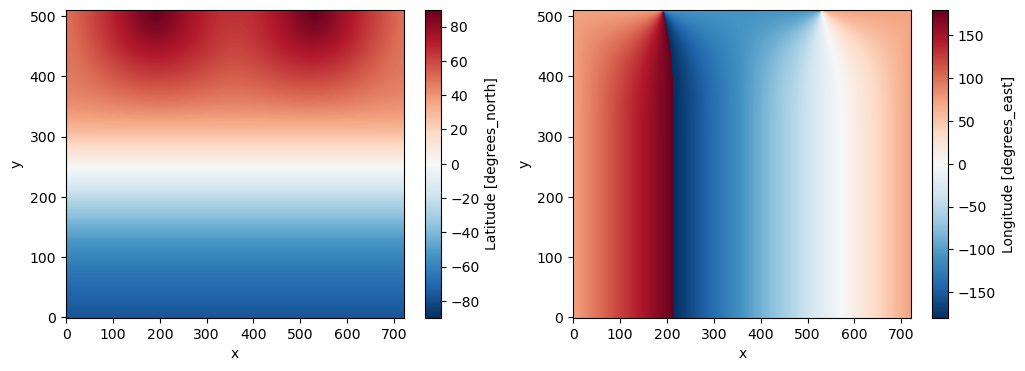

In [40]:
# plot coordinates

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
data.nav_lat.plot(ax=ax1)
data.nav_lon.plot(ax=ax2)

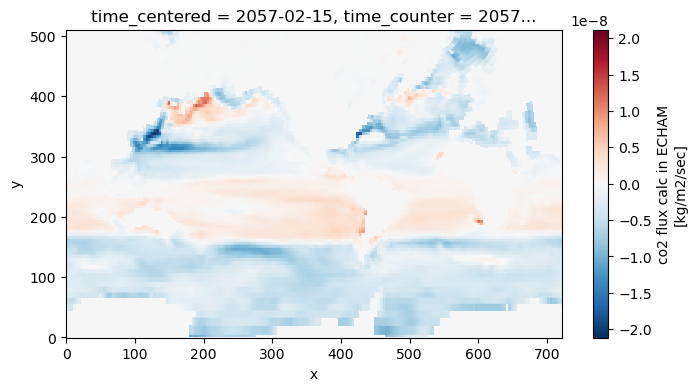

In [41]:
# plot world map at time point [x]
data.co2flux_cpl[505].plot(figsize = (8, 4))

# in alternative
# plt.figure(figsize = (10, 6))
# data.co2flux_cpl[1010].plot()

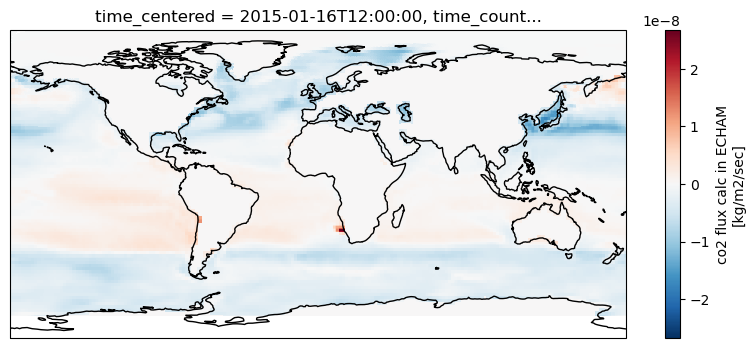

In [47]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
data.co2flux_cpl[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()
ax.set_global()

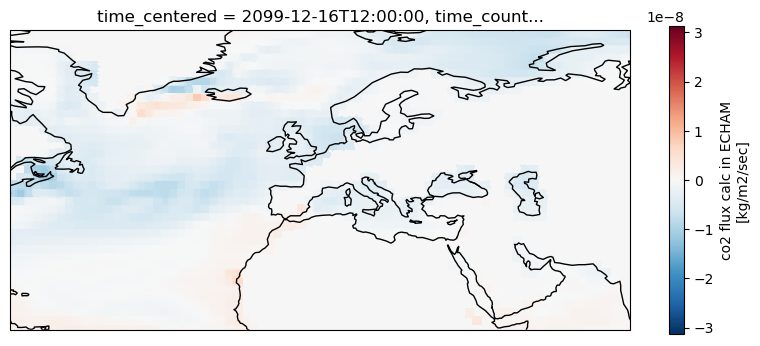

In [48]:
# visualise the data with cartopy

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
data.co2flux_cpl[1019].plot.pcolormesh( # [] to select a month
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True
)
ax.coastlines()
ax.set_extent([75, -70, 10, 60]) # plot a region

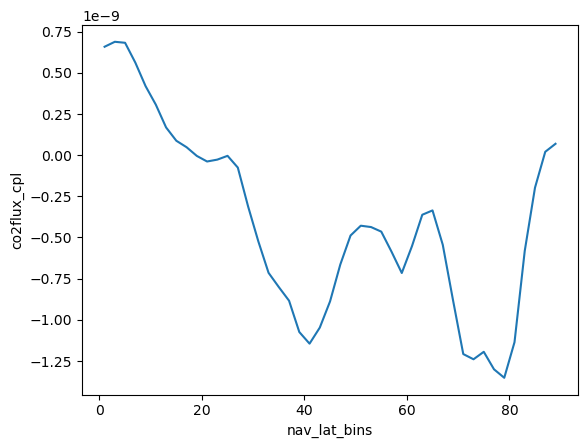

In [31]:
# calculate the mean CO2 flux at each latitude

lat_bins = np.arange(0, 91, 2) # define two-degree wide latitude bins

lat_center = np.arange(1, 90, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lat", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

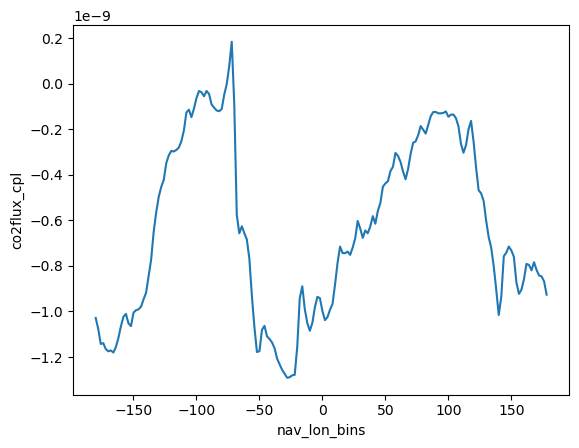

In [6]:
# calculate the mean CO2 flux at each longitude

lon_bins = np.arange(-181, 181, 2) # define two-degree wide latitude bins

lon_center = np.arange(-180, 180, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lon", lon_bins, labels=lon_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

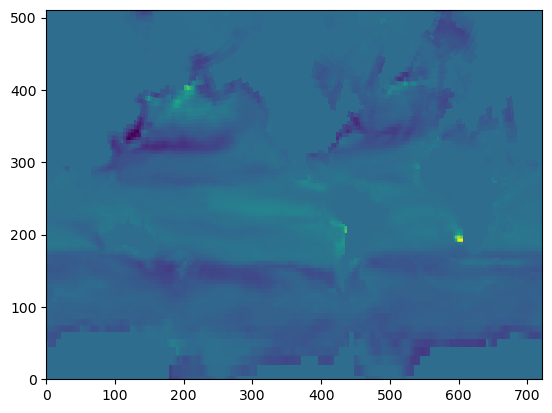

In [49]:
# plot data at time 0

plt.figure()
plt.pcolor(co2flux[1019,:,:])

In [53]:
ds_date_range = data.sel(time_counter=slice('2089', '2099')) # select a time range

In [54]:
df = ds_date_range.to_dataframe() # export data as Pandas dataframe 

In [55]:
df.head() # first lines of new dataframe

nav_lat  nav_lon       time_centered  \
y x time_counter        axis_nbounds                                           
0 0 2089-01-16 12:00:00 0            -77.010475    72.75 2089-01-16 12:00:00   
                        1            -77.010475    72.75 2089-01-16 12:00:00   
    2089-02-15 00:00:00 0            -77.010475    72.75 2089-02-15 00:00:00   
                        1            -77.010475    72.75 2089-02-15 00:00:00   
    2089-03-16 12:00:00 0            -77.010475    72.75 2089-03-16 12:00:00   

                                     time_centered_bounds time_counter_bounds  \
y x time_counter        axis_nbounds                                            
0 0 2089-01-16 12:00:00 0                      2089-01-01          2089-01-01   
                        1                      2089-02-01          2089-02-01   
    2089-02-15 00:00:00 0                      2089-02-01          2089-02-01   
                        1                      2089-03-01          2089-03-01   
    2089-03-16 12:00:00 0                      2089-03-01          2089-03-01   

                                      co2flux_cpl  
y x time_counter        axis_nbounds               
0 0 2089-01-16 12:00:00 0                     0.0  
                        1                     0.0  
    2089-02-15 00:00:00 0                     0.0  
                        1                     0.0  
    2089-03-16 12:00:00 0                     0.0

In [56]:
df.describe() # describe the data 

,nav_lat,nav_lon,co2flux_cpl
count,9.740069e+07,9.740069e+07,9.740069e+07
mean,5.173821e-01,-1.020416e+00,-3.488421e-10
std,5.207631e+01,1.025694e+02,2.129199e-09
min,-7.701048e+01,-1.799970e+02,-2.192818e-08
25%,-5.194667e+01,-9.518312e+01,-1.155809e-09
50%,2.998630e+00,2.482575e+00,0.000000e+00
75%,5.047917e+01,8.425000e+01,2.529922e-10
max,8.988536e+01,1.799988e+02,4.110115e-08


In [57]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')) # time_counter as x months for the selected timeframe

<xarray.DataArray 'co2flux_cpl' (time_counter: 132)>
array([-1.10178868e-09, -1.00566533e-09, -8.15105323e-10, -5.66538218e-10,
       -3.25788988e-10,  6.18898880e-12,  2.31224381e-10,  4.49625383e-10,
        3.31501414e-10,  8.81707831e-11, -5.70301241e-10, -1.05746158e-09,
       -1.07451822e-09, -1.00601841e-09, -8.86856293e-10, -5.68563851e-10,
       -3.40895126e-10, -7.62713311e-11,  2.45686484e-10,  3.97177163e-10,
        4.21753832e-10,  7.16831879e-11, -6.55246513e-10, -1.01696377e-09,
       -1.02282202e-09, -1.05308118e-09, -7.88706503e-10, -6.47008669e-10,
       -3.50317706e-10,  1.62611297e-11,  2.51678598e-10,  4.15503505e-10,
        4.10647549e-10,  1.72281024e-12, -5.43616175e-10, -1.08471139e-09,
       -1.04202510e-09, -1.08822485e-09, -8.11214839e-10, -5.57230792e-10,
       -3.14549771e-10, -4.23387483e-11,  1.93118182e-10,  4.32907964e-10,
        3.19332823e-10,  1.37167176e-12, -5.99672809e-10, -9.78267332e-10,
       -1.09827928e-09, -1.03126836e-09, -8.02277417e-10, -4.81929126e-10,
       -2.67202819e-10, -4.93036226e-11,  2.20876833e-10,  3.84514018e-10,
        4.44261831e-10,  5.41614267e-11, -5.83936386e-10, -9.76498036e-10,
       -1.06675938e-09, -1.02224383e-09, -7.91277845e-10, -5.42877559e-10,
       -3.30869443e-10, -6.01671799e-11,  2.53978036e-10,  5.05041989e-10,
        5.16795294e-10,  1.27504886e-10, -5.31791066e-10, -9.36276929e-10,
       -9.92954596e-10, -1.08087086e-09, -7.79136785e-10, -5.55967789e-10,
       -3.54384563e-10, -1.35542814e-11,  2.35310394e-10,  4.55513944e-10,
        4.28824551e-10,  2.82196821e-11, -6.32617454e-10, -1.06757996e-09,
       -1.13442590e-09, -1.00915895e-09, -8.57621261e-10, -5.39516855e-10,
       -3.22293432e-10, -5.26658734e-11,  2.96324004e-10,  4.87742012e-10,
        4.94974330e-10,  9.06834686e-11, -5.77816845e-10, -9.87476374e-10,
       -9.82378223e-10, -9.71694938e-10, -8.36032004e-10, -5.31753937e-10,
       -3.10672760e-10, -3.96014325e-11,  1.65754889e-10,  3.14241031e-10,
        3.62040839e-10,  1.31249204e-10, -5.69382859e-10, -9.74543182e-10,
       -1.02083552e-09, -9.60386183e-10, -7.71974817e-10, -5.58728877e-10,
       -2.90514337e-10, -1.60032115e-10,  2.34986473e-10,  5.31447233e-10,
        4.15204153e-10,  1.05847044e-10, -4.85781148e-10, -9.47860253e-10,
       -9.21538314e-10, -9.46817135e-10, -7.21579226e-10, -5.29610406e-10,
       -2.65795059e-10,  5.19567115e-12,  3.14634545e-10,  5.01231530e-10,
        3.89458534e-10,  1.48135258e-11, -5.49937216e-10, -9.73323505e-10])
Coordinates:
    time_centered  (time_counter) datetime64[ns] 2089-01-16T12:00:00 ... 2099...
  * time_counter   (time_counter) datetime64[ns] 2089-01-16T12:00:00 ... 2099...

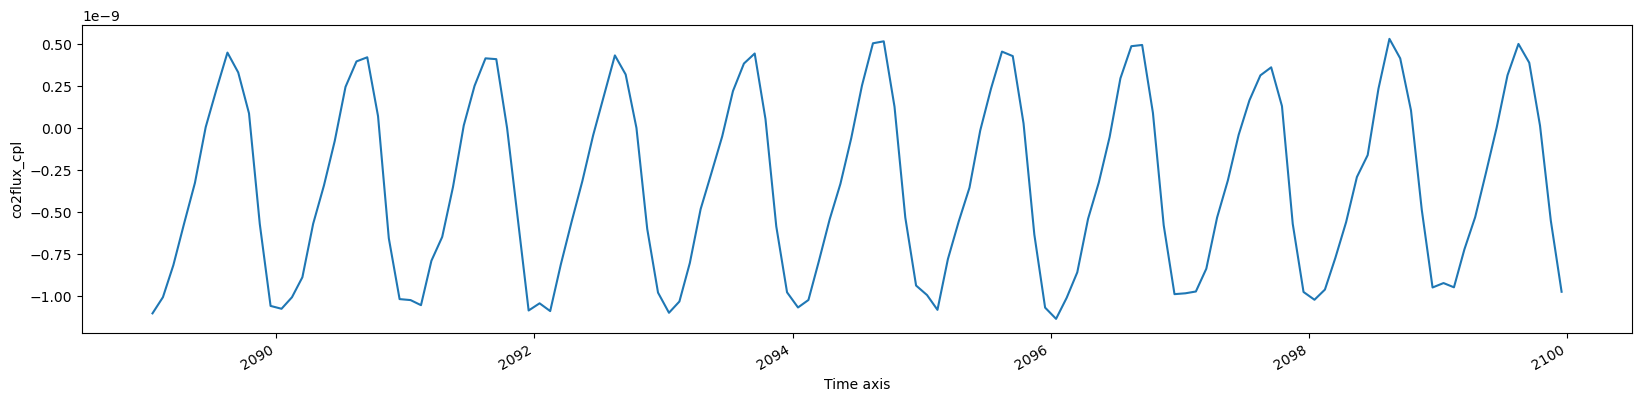

In [58]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean 

In [60]:
mean_array = ds_date_range.mean(dim='time_counter') # mean time
mean_array.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (y: 511, x: 722)
Coordinates:
    nav_lat      (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon      (y, x) float32 72.75 73.25 73.75 74.25 ... 73.01 73.0 73.0
Dimensions without coordinates: y, x
Data variables:
    co2flux_cpl  (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0>

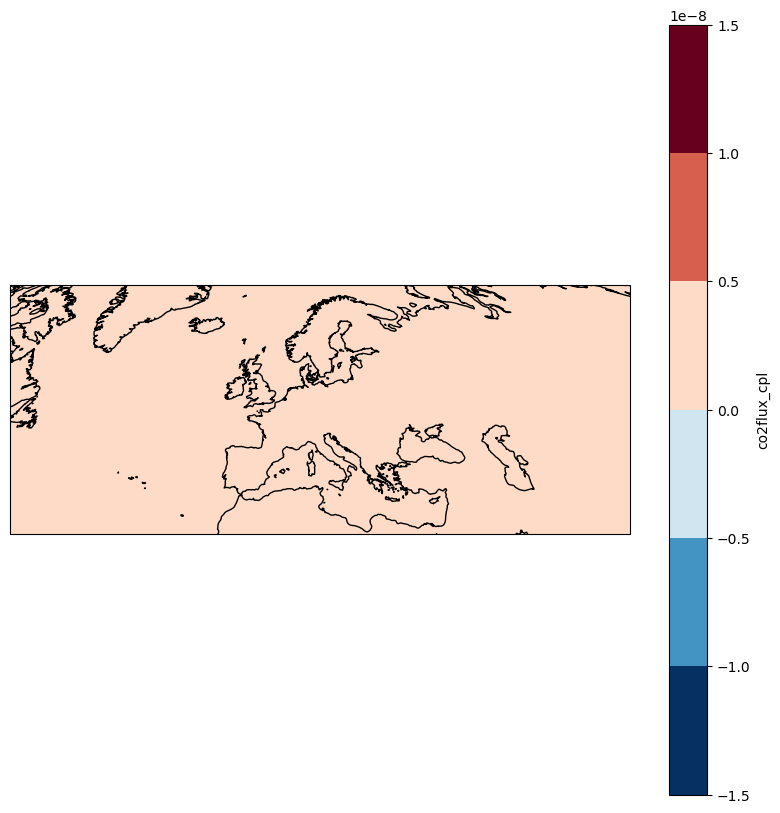

In [62]:
fig=plt.figure(figsize=(10,10), frameon=True) 

ax = plt.axes(projection=ccrs.Mollweide())
mean_array.co2flux_cpl.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines(); ax.set_extent([70, -50, 30, 60]) # plot a region

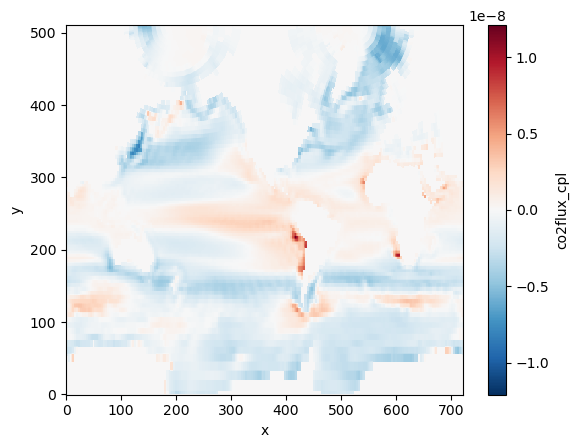

In [64]:
data.co2flux_cpl.mean(dim=('time_counter')).plot()

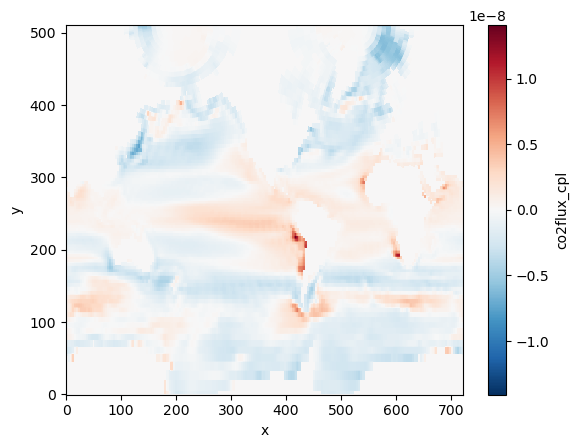

In [63]:
ds_date_range.co2flux_cpl.mean(dim=('time_counter')).plot()

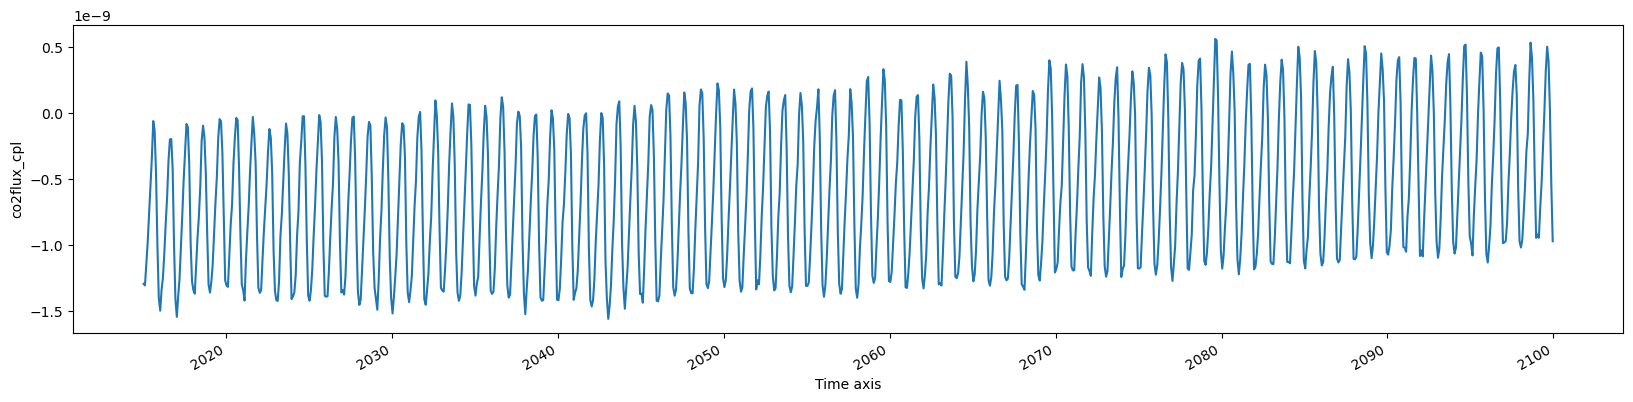

In [65]:
data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean

In [74]:
sliced_data = data.where((-40 < data.nav_lon) & (data.nav_lon < 40) & (20 < data.nav_lat) & (data.nav_lat < 80), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarr

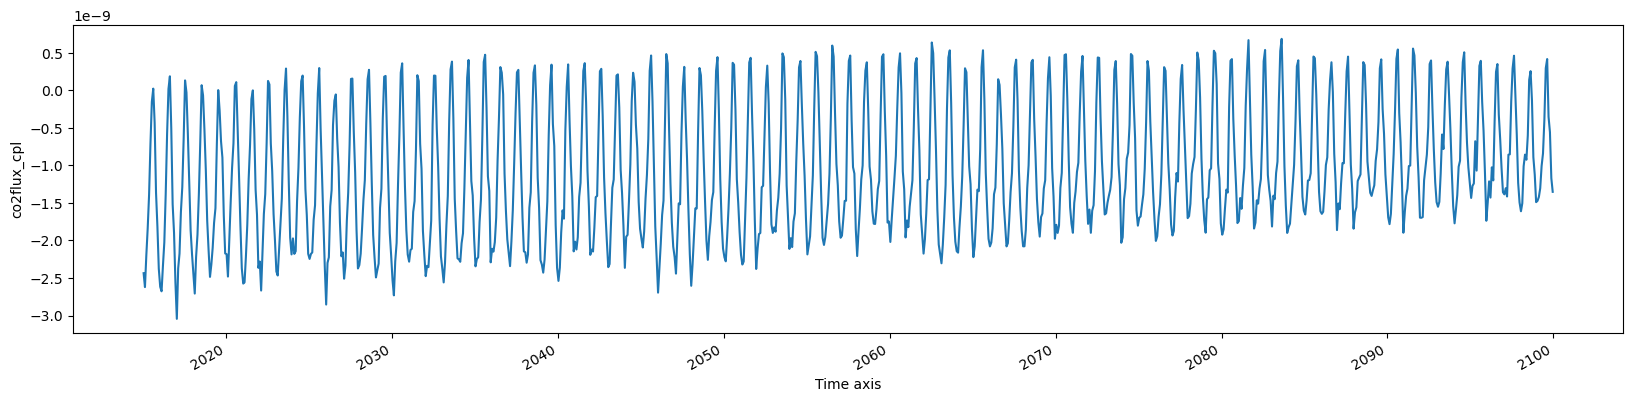

In [75]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # regional mean with OAE

In [76]:
df

nav_lat    nav_lon  \
y   x   time_counter        axis_nbounds                         
0   0   2089-01-16 12:00:00 0            -77.010475  72.750000   
                            1            -77.010475  72.750000   
        2089-02-15 00:00:00 0            -77.010475  72.750000   
                            1            -77.010475  72.750000   
        2089-03-16 12:00:00 0            -77.010475  72.750000   
...                                             ...        ...   
510 721 2099-10-16 12:00:00 1             49.995502  72.999985   
        2099-11-16 00:00:00 0             49.995502  72.999985   
                            1             49.995502  72.999985   
        2099-12-16 12:00:00 0             49.995502  72.999985   
                            1             49.995502  72.999985   

                                               time_centered  \
y   x   time_counter        axis_nbounds                       
0   0   2089-01-16 12:00:00 0            2089-01-16 12:00:00   
                            1            2089-01-16 12:00:00   
        2089-02-15 00:00:00 0            2089-02-15 00:00:00   
                            1            2089-02-15 00:00:00   
        2089-03-16 12:00:00 0            2089-03-16 12:00:00   
...                                                      ...   
510 721 2099-10-16 12:00:00 1            2099-10-16 12:00:00   
        2099-11-16 00:00:00 0            2099-11-16 00:00:00   
                            1            2099-11-16 00:00:00   
        2099-12-16 12:00:00 0            2099-12-16 12:00:00   
                            1            2099-12-16 12:00:00   

                                         time_centered_bounds  \
y   x   time_counter        axis_nbounds                        
0   0   2089-01-16 12:00:00 0                      2089-01-01   
                            1                      2089-02-01   
        2089-02-15 00:00:00 0                      2089-02-01   
                            1                      2089-03-01   
        2089-03-16 12:00:00 0                      2089-03-01   
...                                                       ...   
510 721 2099-10-16 12:00:00 1                      2099-11-01   
        2099-11-16 00:00:00 0                      2099-11-01   
                            1                      2099-12-01   
        2099-12-16 12:00:00 0                      2099-12-01   
                            1                      2100-01-01   

                                         time_counter_bounds  co2flux_cpl  
y   x   time_counter        axis_nbounds                                   
0   0   2089-01-16 12:00:00 0                     2089-01-01          0.0  
                            1                     2089-02-01          0.0  
        2089-02-15 00:00:00 0                     2089-02-01          0.0  
                            1                     2089-03-01          0.0  
        2089-03-16 12:00:00 0                     2089-03-01          0.0  
...                                                      ...          ...  
510 721 2099-10-16 12:00:00 1                     2099-11-01          0.0  
        2099-11-16 00:00:00 0                     2099-11-01          0.0  
                            1                     2099-12-01          0.0  
        2099-12-16 12:00:00 0                     2099-12-01          0.0  
                            1                     2100-01-01          0.0  

[97400688 rows x 6 columns]

In [77]:
df_sliced = sliced_data.to_dataframe() # export data as Pandas dataframe 

In [78]:
df_sliced

time_centered_bounds  \
time_counter        axis_nbounds y   x                          
2015-01-16 12:00:00 0            0   0             2015-01-01   
                                     1             2015-01-01   
                                     2             2015-01-01   
                                     3             2015-01-01   
                                     4             2015-01-01   
...                                                       ...   
2099-12-16 12:00:00 1            195 155                  NaT   
                                     156                  NaT   
                                     157                  NaT   
                                     158                  NaT   
                                     159                  NaT   

                                         time_counter_bounds   co2flux_cpl  \
time_counter        axis_nbounds y   x                                       
2015-01-16 12:00:00 0            0   0            2015-01-01 -6.591711e-10   
                                     1            2015-01-01 -6.591711e-10   
                                     2            2015-01-01 -6.591711e-10   
                                     3            2015-01-01 -6.394268e-10   
                                     4            2015-01-01 -6.366062e-10   
...                                                      ...           ...   
2099-12-16 12:00:00 1            195 155                 NaT           NaN   
                                     156                 NaT           NaN   
                                     157                 NaT           NaN   
                                     158                 NaT           NaN   
                                     159                 NaT           NaN   

                                            nav_lat    nav_lon  \
time_counter        axis_nbounds y   x                           
2015-01-16 12:00:00 0            0   0    20.076111 -39.750000   
                                     1    20.076111 -39.250000   
                                     2    20.076111 -38.750000   
                                     3    20.076111 -38.250000   
                                     4    20.076111 -37.750000   
...                                             ...        ...   
2099-12-16 12:00:00 1            195 155  62.771477  63.586666   
                                     156  62.561115  63.716667   
                                     157  62.351021  63.845455   
                                     158  62.141201  63.973076   
                                     159  61.931664  64.099571   

                                               time_centered  
time_counter        axis_nbounds y   x                        
2015-01-16 12:00:00 0            0   0   2015-01-16 12:00:00  
                                     1   2015-01-16 12:00:00  
                                     2   2015-01-16 12:00:00  
                                     3   2015-01-16 12:00:00  
                                     4   2015-01-16 12:00:00  
...                                                      ...  
2099-12-16 12:00:00 1            195 155 2099-12-16 12:00:00  
                                     156 2099-12-16 12:00:00  
                                     157 2099-12-16 12:00:00  
                                     158 2099-12-16 12:00:00  
                                     159 2099-12-16 12:00:00  

[63974400 rows x 6 columns]

Text(0.5, 1.02, 'CO2 flux')

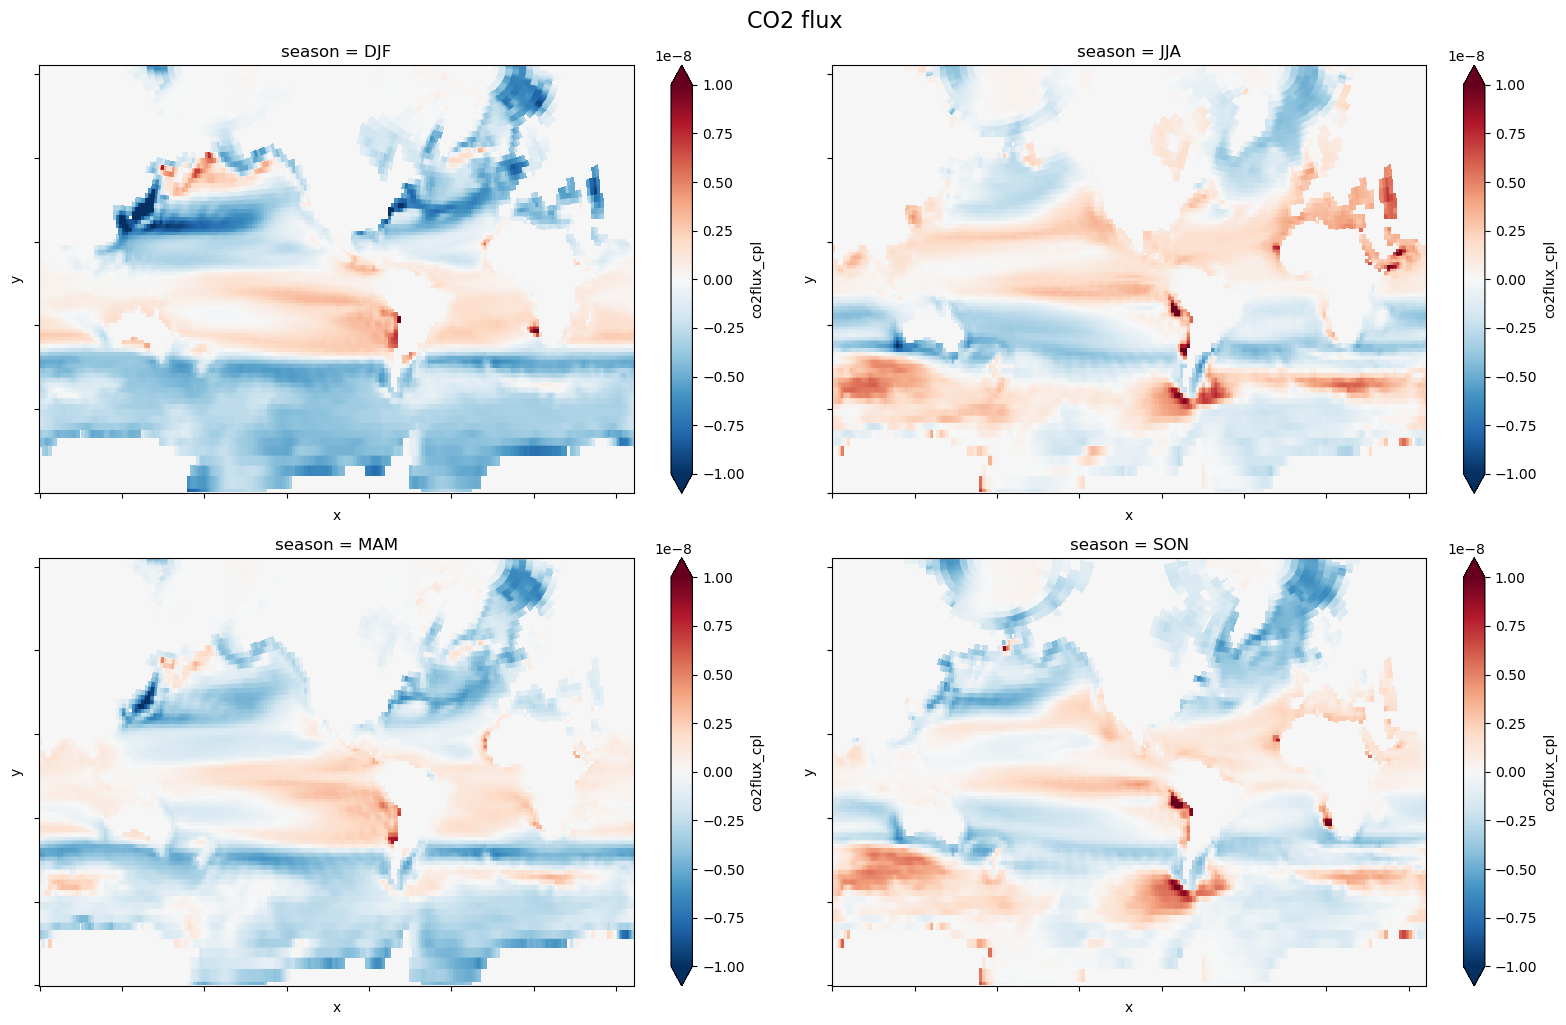

In [79]:
ds_season = data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

AttributeError: 'AxesSubplot' object has no attribute 'coastlines'

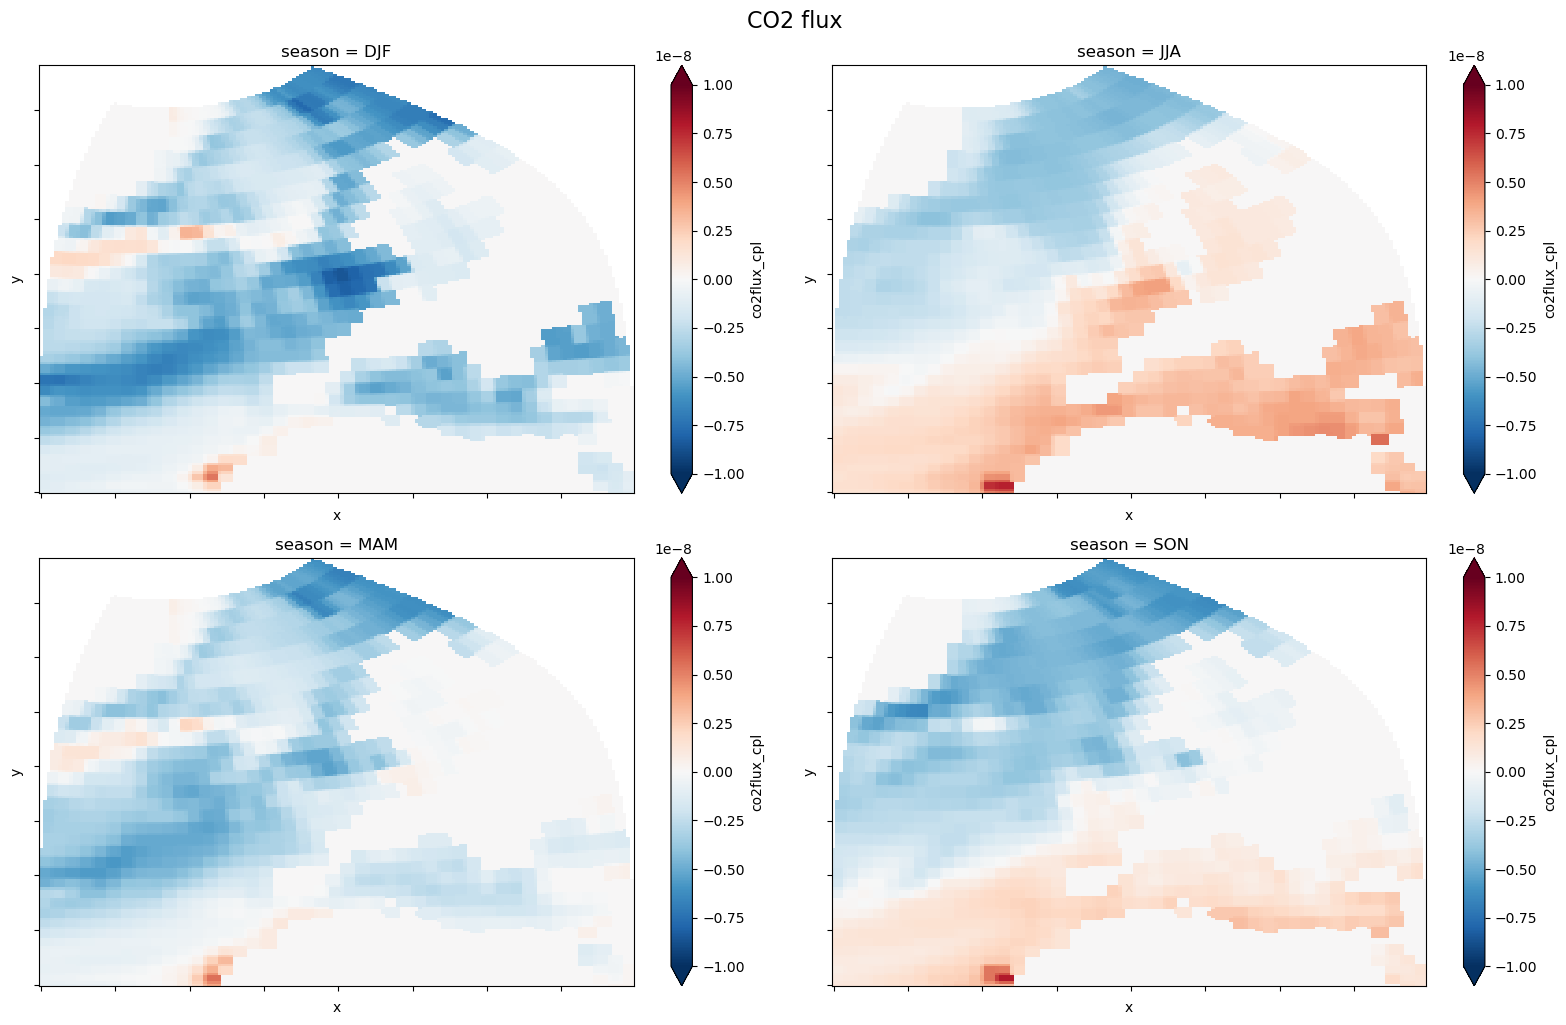

In [86]:
ds_season = sliced_data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

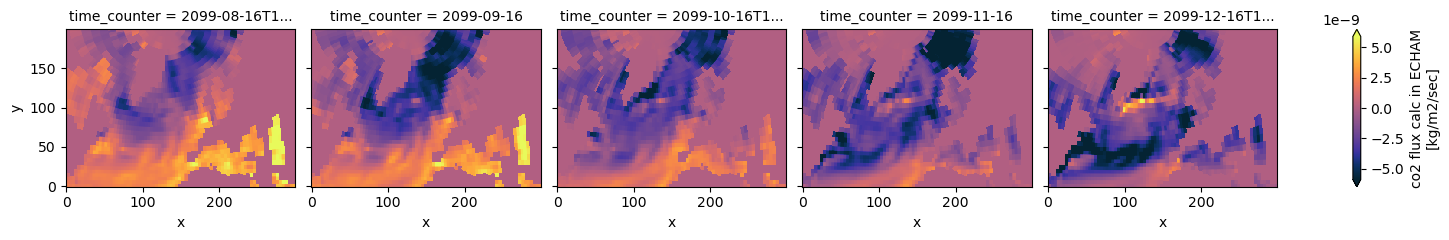

In [83]:
# last seven days of the simulation

ds = '/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc'

cmap = cmocean.cm.thermal
with xr.open_dataset(ds) as xadf:
    pd = xadf.isel(time_counter=slice(-5,None), y=slice(300, 500), x=slice(400, 700)) #last seven days
    facet = pd['co2flux_cpl'].plot(x='x', y='y', col='time_counter',col_wrap=5,robust=True,figsize=(16,2.5),cmap=cmap)